# IAU Projekt

### Zadanie (the quest)

* Každá dvojica bude pracovať s pridelenou dátovou sadou (3. týždeň).
* Vašou úlohou je vedieť predikovať závislú hodnotu (indikator)

Budete sa musieť pritom vysporiadať s viacerými problémami, ktoré sa v dátach nachádzajú ako formáty dát, chýbajúce, vychýlené hodnoty a pod.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
filename_labor = "046/labor.csv"
labor = pd.read_csv(filename_labor, sep='\t')
labor.head()

Unnamed: 0     weight          ssn  hemoglobin       alp    etytr      alt  \
0           0   12.35740  803-27-3974     5.94182  86.80991  7.12559  2.18482   
1           1  118.10209  205-46-9278     6.45407  79.22919  5.34025  1.60706   
2           2   89.97897  507-12-0831     9.73090  17.97254  9.49744  1.75153   
3           3  137.89307  328-79-8098     8.65753  19.63713  8.90814  5.80869   
4           4   95.55653  307-37-5739     5.96644  82.63100  6.84092  3.16471   

   erytrocyty    hbver             name  hematokrit  indicator     er-cv  \
0     7.53345  7.51373  Kayla Rodriguez     6.98497        1.0  57.08422   
1     6.53048  7.30977       Diane Holt     8.65706        1.0  63.49068   
2     5.96430  8.02289  David Bryant MD     7.46431        1.0  66.64176   
3     8.47758  7.37768   Joshua Hickman     9.15039        1.0  62.03448   
4     7.38053  8.07490     Frank Glover     9.55976        1.0  79.48715   

   leukocyty smoker relationship       ast  trombocyty  
0    7.21726      Y      married  77.99546     7.98017  
1    9.35320     no      widowed  31.27623     9.27384  
2    7.36311     no          nop  52.03928     8.18942  
3    6.50476     no       single  63.20161     6.22091  
4    9.45322      N      married  28.53852     7.38761

In [3]:
filename_profiles = "046/profiles.csv"
profiles = pd.read_csv(filename_profiles, sep='\t')
profiles.head()

Unnamed: 0      race                                          residence  \
0           0     White                108 Pham Loaf\nNew Shelby, IN 31526   
1           1     Asian    2246 Tammy Cliffs Apt. 057\nNorth Kim, MI 55878   
2           2     White     12245 Maxwell Island\nNorth Benjamin, KY 38697   
3           3     White  17000 Saunders Circles Apt. 457\nDonaldhaven, ...   
4           4  Hawaiian  43712 Andrea Expressway\nNorth Mckenzie, AZ 31049   

                              job             birthdate  \
0        Magazine features editor            2007/09/11   
1  Investment banker, operational            1971/05/20   
2              Charity fundraiser           09 Oct 1945   
3            Engineer, production  04/25/2006, 00:00:00   
4                   IT consultant            1936-03-01   

                        company blood_group sex          ssn             name  
0  Reynolds, Stewart and Tanner          O+   F  087-49-2961  Laura Valentine  
1                Mcdonald-White          A-   F  704-69-2733  Angela Sullivan  
2    Waters, Davis and Mcintyre         AB+   F  787-12-1516    Haley Ramirez  
3               Watson and Sons          A+   F  127-86-0135      Mary Harris  
4                   Alvarez PLC          B+   M  875-46-1555     Jeremy James

### 1. Základný opis dát spolu s ich charakteristikami (5 bodov)

* Pre dosiahnutie plného počtu bodov uveďte
* počet záznamov,
* počet atribútov,
* ich typy,
* pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

#### DATASET labor.csv

In [4]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10002 non-null  int64  
 1   weight        10002 non-null  float64
 2   ssn           10002 non-null  object 
 3   hemoglobin    9972 non-null   float64
 4   alp           9972 non-null   float64
 5   etytr         9972 non-null   float64
 6   alt           9971 non-null   float64
 7   erytrocyty    9972 non-null   float64
 8   hbver         9972 non-null   float64
 9   name          10002 non-null  object 
 10  hematokrit    9972 non-null   float64
 11  indicator     10002 non-null  float64
 12  er-cv         9972 non-null   float64
 13  leukocyty     9972 non-null   float64
 14  smoker        10002 non-null  object 
 15  relationship  10002 non-null  object 
 16  ast           9972 non-null   float64
 17  trombocyty    9972 non-null   float64
dtypes: float64(13), int64(1), 

Pomocou tohto výpisu sa dajú zistiť všetky potrebné informácie:

- Počet záznamov (2. riadok): 10002 (0 - 10001)

- Počet atribútov (3. riadok): 18 (0 - 17)

- Typy atribútov (4. stĺpec v tabuľke): int64, float64, object

Okrem iného sa dá z toho vyčítať, že všetky hodnoty, ktoré nie sú typ číslo (int64, float64) nie sú žiadne, teda NaN hodnoty. Preto všetky záznamy patria nejakým osobám

In [5]:
labor.duplicated().any()

False

V dátach sa nenachádzajú duplicitné záznamy.

###### Kategorické atribúty

Ďalší zaujímavý atribút je ssn. Ide o Social Security Number (SSN), ktoré sa používa podobne ako u nás číslo občianského preukazu, čiže ide len o administratívny údaj.

Teraz sa idem pozrieť na ostatné atribúty typu object a ich hodnoty.

In [6]:
labor['smoker'].value_counts()

no     5497
yes    2093
Y      1917
N       495
Name: smoker, dtype: int64

In [7]:
labor["smoker"].replace({"Y": 1, "N": 0, "yes": 1, "no": 0}, inplace=True)

In [8]:
labor['smoker'].value_counts()

0    5992
1    4010
Name: smoker, dtype: int64

Hoci atribút 'smoker' je dopytovací, hodnoty sú štyri. Je pravdepodobné, že ide o označenie tých istých odovedí rôznym spôsobom, preto môžem zlúčiť hodnoty 'yes' s '1' a 'no' s '0'.

<AxesSubplot:ylabel='smoker'>

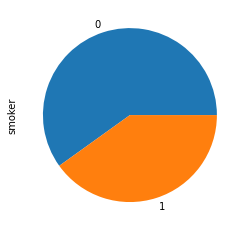

In [9]:
labor['smoker'].value_counts().plot(kind='pie')

In [10]:
labor['relationship'].value_counts()

divoced      2523
married      2474
single       2028
nop          1017
widowed       982
separated     978
Name: relationship, dtype: int64

Atribút 'relationship' neobsahuje žiadne NaN hodnoty alebo nejednoznačné typy hodnôt.

<AxesSubplot:>

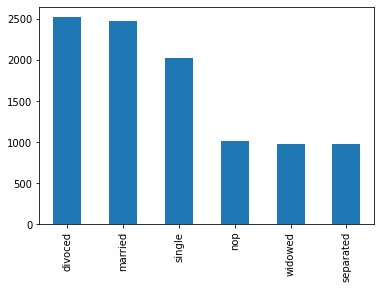

In [11]:
labor['relationship'].value_counts().plot(kind='bar')

###### Premenovanie prvého stĺpca:

In [12]:
labor.rename(columns = {"Unnamed: 0": "index"}, inplace = True)

In [13]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         10002 non-null  int64  
 1   weight        10002 non-null  float64
 2   ssn           10002 non-null  object 
 3   hemoglobin    9972 non-null   float64
 4   alp           9972 non-null   float64
 5   etytr         9972 non-null   float64
 6   alt           9971 non-null   float64
 7   erytrocyty    9972 non-null   float64
 8   hbver         9972 non-null   float64
 9   name          10002 non-null  object 
 10  hematokrit    9972 non-null   float64
 11  indicator     10002 non-null  float64
 12  er-cv         9972 non-null   float64
 13  leukocyty     9972 non-null   float64
 14  smoker        10002 non-null  int64  
 15  relationship  10002 non-null  object 
 16  ast           9972 non-null   float64
 17  trombocyty    9972 non-null   float64
dtypes: float64(13), int64(2), 

###### Numerické artibúty:

array([[<AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'alt'}>],
       [<AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>],
       [<AxesSubplot:title={'center':'hbver'}>,
        <AxesSubplot:title={'center':'hematokrit'}>],
       [<AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'indicator'}>],
       [<AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'smoker'}>],
       [<AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

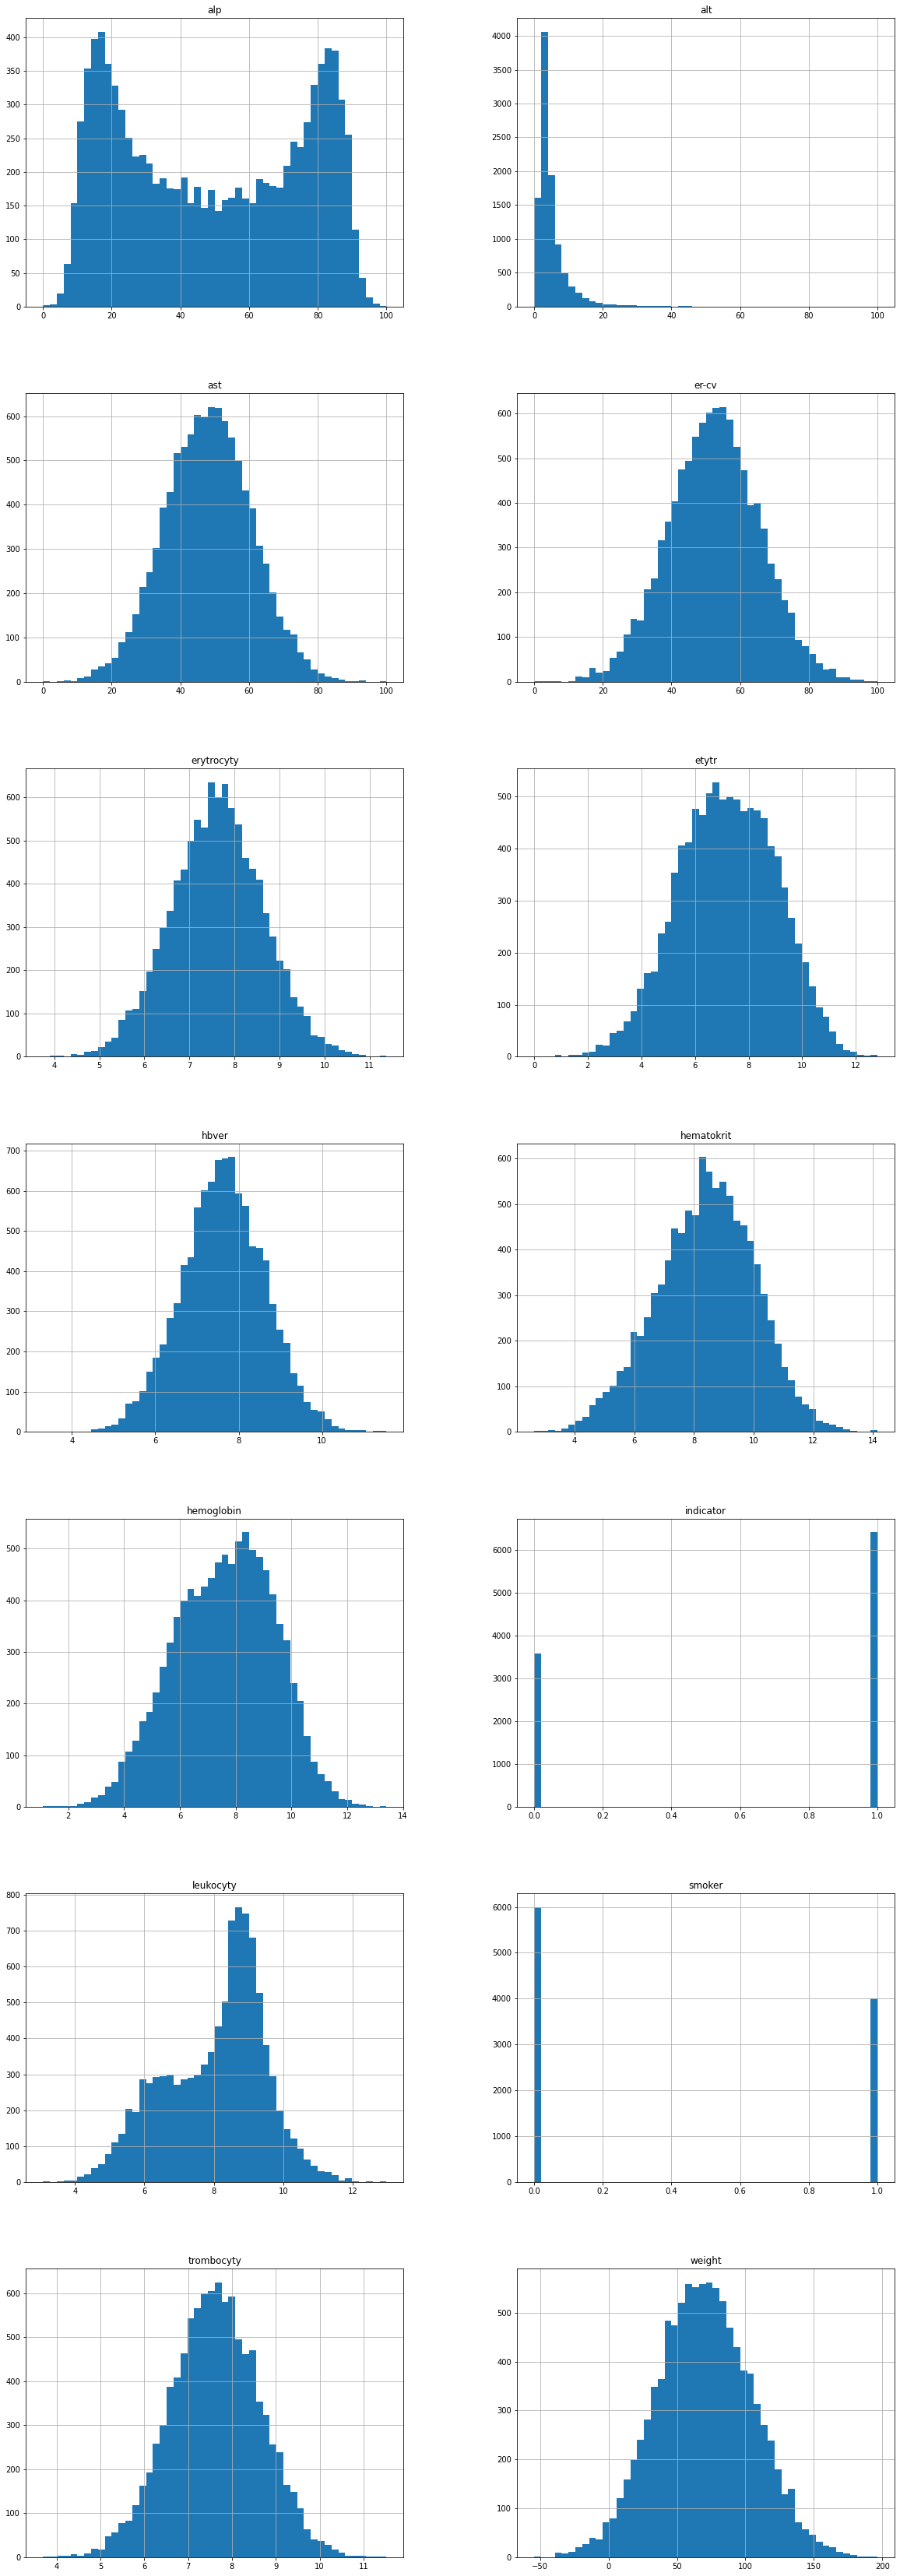

In [14]:
labor.loc[:, labor.columns.difference(["index"])].hist(layout=(7,2), sharex=False, sharey=False, figsize=(20, 60), bins=50)

alp              AxesSubplot(0.125,0.749828;0.227941x0.130172)
alt           AxesSubplot(0.398529,0.749828;0.227941x0.130172)
ast           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
er-cv            AxesSubplot(0.125,0.593621;0.227941x0.130172)
erytrocyty    AxesSubplot(0.398529,0.593621;0.227941x0.130172)
etytr         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
hbver            AxesSubplot(0.125,0.437414;0.227941x0.130172)
hematokrit    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
hemoglobin    AxesSubplot(0.672059,0.437414;0.227941x0.130172)
indicator        AxesSubplot(0.125,0.281207;0.227941x0.130172)
leukocyty     AxesSubplot(0.398529,0.281207;0.227941x0.130172)
smoker        AxesSubplot(0.672059,0.281207;0.227941x0.130172)
trombocyty          AxesSubplot(0.125,0.125;0.227941x0.130172)
weight           AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

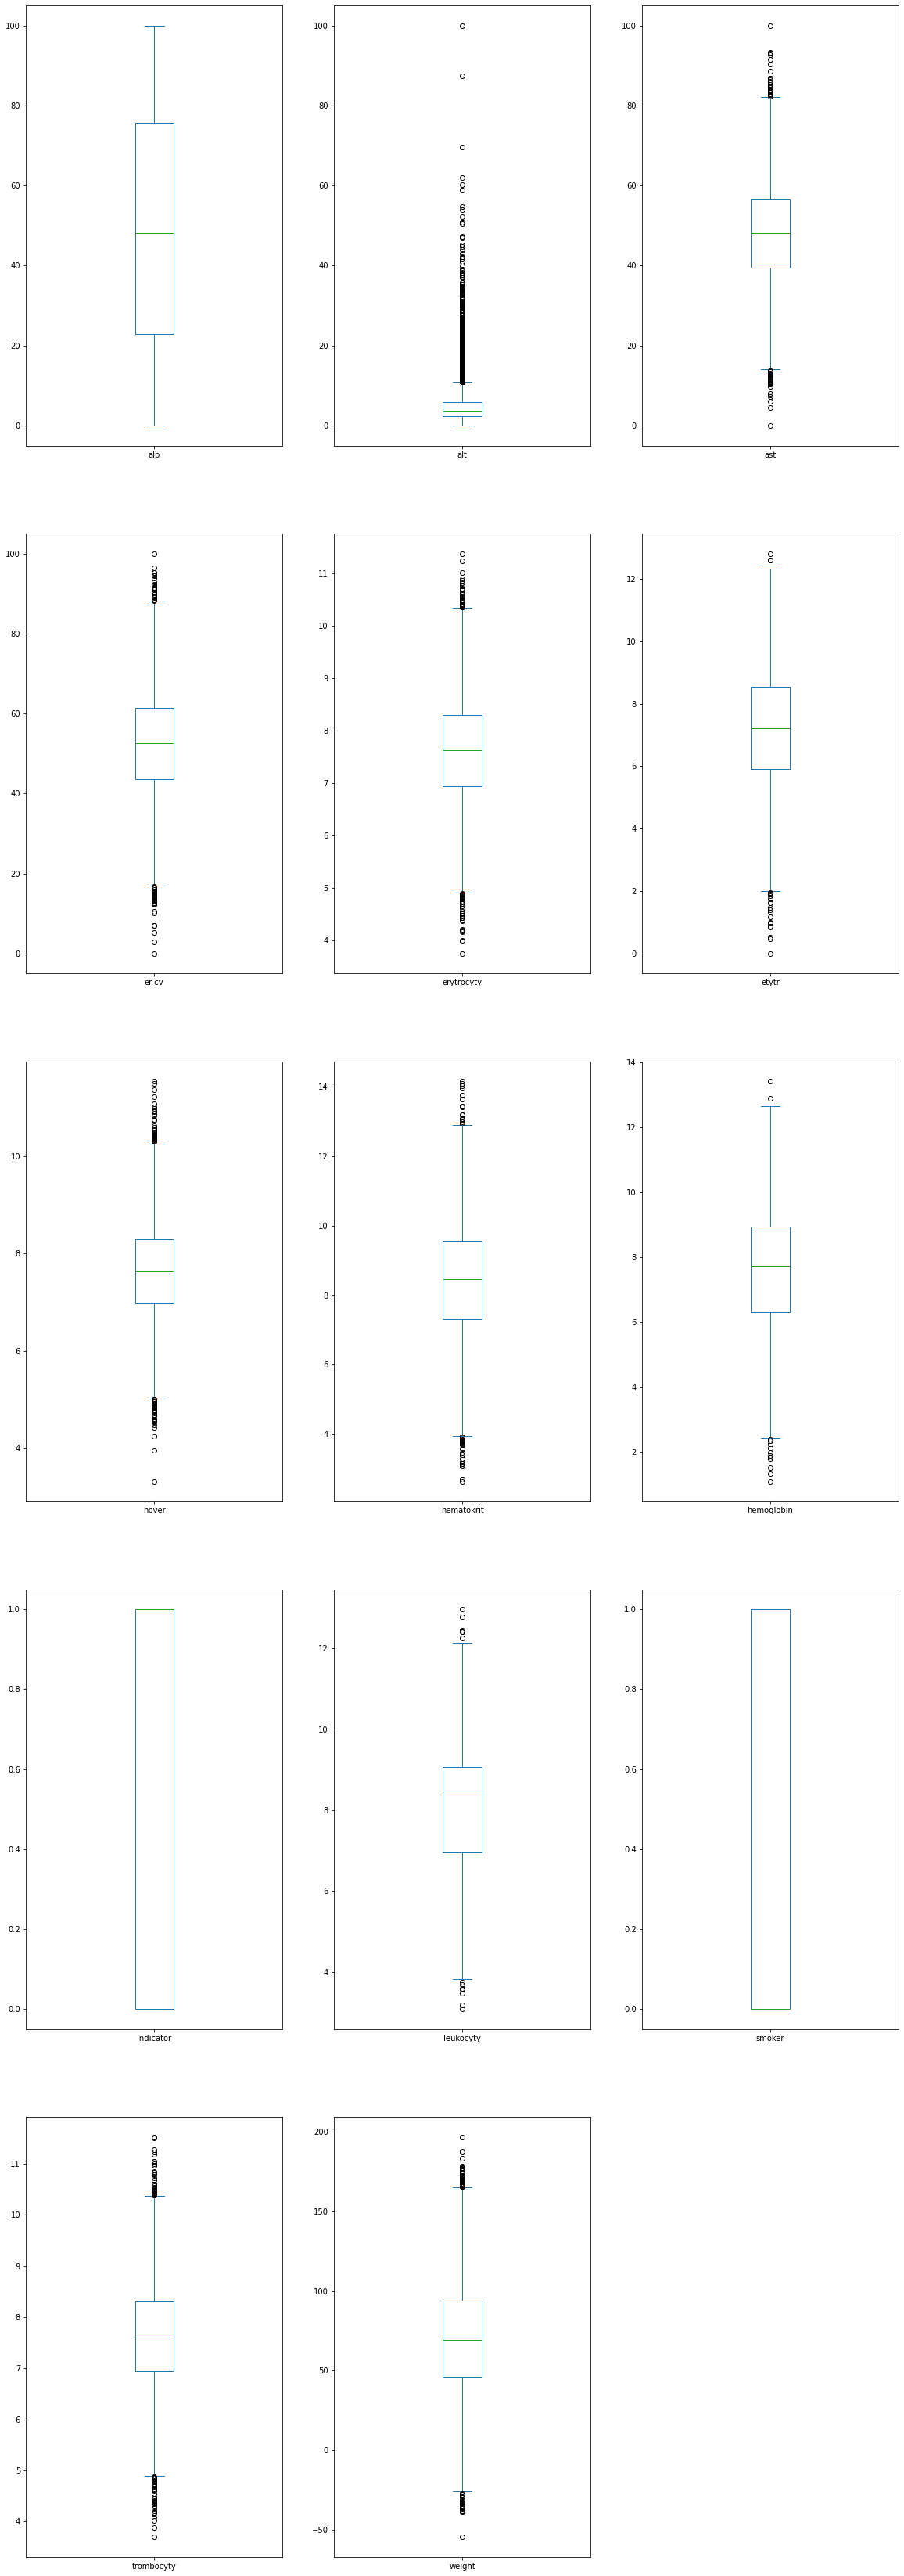

In [15]:
labor.loc[:, labor.columns.difference(["index"])].plot(kind='box', subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize=(20, 60))

###### Hmotnosť

Podľa opisu numerických atribútov sme si všimli hneď jednu zvláštnosť. Minimálna hmotnosť je záporné číslo, čo v reálnom svete nie je možné. Preto sa na atribút hmotnosti pozrieme bližšie.

Z tohto grafu je vidieť, že hmotnosť nie je uvedená vo všetkých záznamoch správne.

##### Deskriptívna štatistika

Podľa vypísaných dát je možné vidieť, že úplne prvý nemenovaný atribút je len na označenie, očíslovanie.

In [16]:
labor.describe()

index        weight   hemoglobin          alp        etytr  \
count  10002.00000  10002.000000  9972.000000  9972.000000  9972.000000   
mean    5000.50000     70.058861     7.605314    49.153497     7.199437   
std     2887.47303     34.958888     1.776103    26.764248     1.820026   
min        0.00000    -54.420260     1.094900     0.000000     0.000000   
25%     2500.25000     46.000222     6.312152    22.855040     5.915890   
50%     5000.50000     69.549650     7.696805    48.204640     7.213465   
75%     7500.75000     93.765605     8.926235    75.731702     8.536662   
max    10001.00000    196.504820    13.406460   100.000000    12.810620   

               alt   erytrocyty        hbver   hematokrit     indicator  \
count  9971.000000  9972.000000  9972.000000  9972.000000  10002.000000   
mean      5.044637     7.617145     7.630895     8.399749      0.642172   
std       5.034543     1.014691     0.998321     1.645404      0.479385   
min       0.000000     3.748700     3.308740     2.638960      0.000000   
25%       2.388415     6.939980     6.979278     7.311500      0.000000   
50%       3.594600     7.625955     7.634975     8.468190      1.000000   
75%       5.812480     8.299573     8.297892     9.556283      1.000000   
max     100.000000    11.374090    11.543380    14.156900      1.000000   

             er-cv    leukocyty        smoker          ast   trombocyty  
count  9972.000000  9972.000000  10002.000000  9972.000000  9972.000000  
mean     52.472936     8.048166      0.400920    48.112926     7.620192  
std      13.227003     1.437330      0.490109    12.591762     1.023536  
min       0.000000     3.083190      0.000000     0.000000     3.691730  
25%      43.539318     6.964645      0.000000    39.480480     6.936850  
50%      52.512610     8.390985      0.000000    48.209275     7.618780  
75%      61.322150     9.056193      1.000000    56.575533     8.311490  
max     100.000000    12.962710      1.000000   100.000000    11.523520

Na základe desktriptívnych štatistík vidíme, že niektoré hodnoty sú nesprávne. Napríklad minimálna váha osoby je -54, čo nie je možné.

##### Chýbajúce hodnoty

In [17]:
labor.shape[0] - labor.dropna().shape[0]

330

In [18]:
labor.isnull().sum()

index            0
weight           0
ssn              0
hemoglobin      30
alp             30
etytr           30
alt             31
erytrocyty      30
hbver           30
name             0
hematokrit      30
indicator        0
er-cv           30
leukocyty       30
smoker           0
relationship     0
ast             30
trombocyty      30
dtype: int64

In [19]:
labor.isnull().sum().sum()

331

In [20]:
print("Chýbajúce dáta tvoria {:.3f}% dát".format(labor.isnull().sum().sum() / labor.shape[0] * 100))

Chýbajúce dáta tvoria 3.309% dát


Nahradiť chýbajúce atribúty mediánmi alebo priemermi. Chýbajúce hodnoty predstavujú zhruba 3,3% všetkých hodnôt a preto ich nahradenie mediánmi pravdepodobne nespôsobí žiadne ťažkosti.

## Profiles

In [21]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3097 non-null   int64 
 1   race         3097 non-null   object
 2   residence    3097 non-null   object
 3   job          3097 non-null   object
 4   birthdate    3097 non-null   object
 5   company      3097 non-null   object
 6   blood_group  3097 non-null   object
 7   sex          3097 non-null   object
 8   ssn          3097 non-null   object
 9   name         3097 non-null   object
dtypes: int64(1), object(9)
memory usage: 242.1+ KB


Pomocou tohto výpisu sa dajú zistiť všetky potrebné informácie:

- Počet záznamov (2. riadok): 3097 (0 - 3096)

- Počet atribútov (3. riadok): 10 (0 - 9)

- Typy atribútov (4. stĺpec v tabuľke): int64, object

Okrem iného sa dá z toho vyčítať, že všetky zápisy nemajú žiadne NaN hodnoty, lebo počet všetkých záznamov sa rovná počtu hodnôt pre každý atribút

##### Duplikáty

In [22]:
profiles.duplicated().any()

False

To znamená, že v dátach nie sú žiadne duplicitné záznamy.

In [23]:
labor.nunique()

index           10002
weight           9902
ssn              3097
hemoglobin       9793
alp              9868
etytr            9802
alt              9805
erytrocyty       9753
hbver            9744
name             3034
hematokrit       9800
indicator           2
er-cv            9859
leukocyty        9784
smoker              2
relationship        6
ast              9867
trombocyty       9740
dtype: int64

In [24]:
profiles.nunique()

Unnamed: 0     3097
race              8
residence      3097
job             630
birthdate      3058
company        2914
blood_group       8
sex               2
ssn            3097
name           3034
dtype: int64

Na základe toho, že počet ssn sa zhoduje s počtom riadkov v tabuľke profiles, môžeme usúdiť, že žiadne duplicitné záznamy sa v tabuľke profiles nenachádzajú

###### Kategorické atribúty

###### race

In [25]:
profiles['race'].value_counts()

White       1576
Black        780
Asian        296
Hawaiian     152
Indian       135
black         93
white         33
blsck         32
Name: race, dtype: int64

<AxesSubplot:>

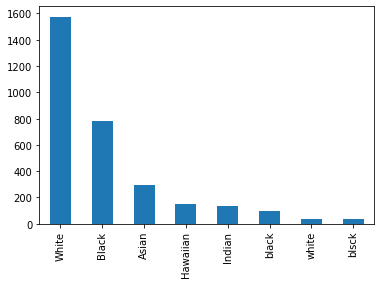

In [26]:
profiles['race'].value_counts().plot(kind='bar')

Tento atribút obsahuje nejednotné formáty: White - white, Black - black, blsck (zjavne ide iba o preklep pri písaní).

In [27]:
profiles["race"].replace({"black": "Black", "white": "White", "blsck": "Black"}, inplace=True)

In [28]:
profiles['race'].value_counts()

White       1609
Black        905
Asian        296
Hawaiian     152
Indian       135
Name: race, dtype: int64

###### birthday

In [29]:
profiles['birthdate'].value_counts()

01/14/1908, 00:00:00    2
02/04/1968, 00:00:00    2
1927-08-28              2
03/16/1970, 00:00:00    2
1970/10/19              2
                       ..
1983/04/16              1
10 Dec 1956             1
09 Dec 1981             1
1946/11/15              1
07/16/1922, 00:00:00    1
Name: birthdate, Length: 3058, dtype: int64

Už iba podľa malého náhľadú na hodnoty tohto atribútu vidno, že dátumy sú nejednotné. Vhodné by bolo ich mať v jednom formáte.

In [30]:
profiles['birthdate'] = pd.to_datetime(profiles['birthdate'], utc=False)

In [31]:
profiles['birthdate'].value_counts()

1997-08-13    4
2013-01-20    3
1927-09-05    3
1912-08-31    2
1932-01-29    2
             ..
1945-04-22    1
1984-08-06    1
1950-07-18    1
1947-10-13    1
1922-07-16    1
Name: birthdate, Length: 2956, dtype: int64

Ešte skontrolujem rozsah

In [32]:
profiles['birthdate'].describe(datetime_is_numeric=True)

count                             3097
mean     1963-09-12 20:10:18.404907968
min                1905-10-08 00:00:00
25%                1933-08-07 00:00:00
50%                1963-12-27 00:00:00
75%                1992-09-23 00:00:00
max                2021-09-14 00:00:00
Name: birthdate, dtype: object

###### blood_group

<AxesSubplot:>

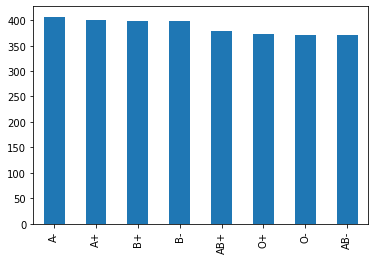

In [33]:
profiles['blood_group'].value_counts().plot(kind='bar')

######  sex

In [34]:
profiles['sex'].value_counts()

F    1568
M    1529
Name: sex, dtype: int64

V tomto prípade, všetky typy atribútov majú jednotný formát. A je vidno, že rozdelenie pohlavia je približne rovnaké.

<AxesSubplot:ylabel='sex'>

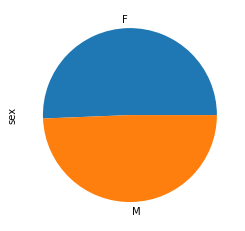

In [35]:
profiles['sex'].value_counts().plot(kind='pie')

###### ssn

In [36]:
profiles['ssn'].value_counts()

087-49-2961    1
049-29-3450    1
413-78-6839    1
490-12-7724    1
668-35-1604    1
              ..
759-31-2559    1
882-93-4577    1
310-81-4482    1
761-96-7670    1
127-21-2115    1
Name: ssn, Length: 3097, dtype: int64

Atribút SSN je Social Security Number, ktoré sa používa podobne ako u nás číslo občianského preukazu, čiže ide len o administratívny údaj.

###### Numerické atribúty a Deskriptívna štatistika

Záznamy neobsahujú žiadne numerické atribúty okrem spomínaného prvého atribútu, ale ten možno pokladať za číslovanie.

In [37]:
profiles = profiles.drop(profiles.columns[0], axis=1)

In [38]:
profiles.describe(datetime_is_numeric=True)

birthdate
count                           3097
mean   1963-09-12 20:10:18.404907968
min              1905-10-08 00:00:00
25%              1933-08-07 00:00:00
50%              1963-12-27 00:00:00
75%              1992-09-23 00:00:00
max              2021-09-14 00:00:00

###### Chýbajúce hodnoty

In [39]:
profiles.shape[0] - profiles.dropna().shape[0]

0

In [40]:
profiles.isnull().sum()

race           0
residence      0
job            0
birthdate      0
company        0
blood_group    0
sex            0
ssn            0
name           0
dtype: int64

In [41]:
profiles.isnull().sum().sum()

0

Dataset profiles neobsahuje žiadne chýbajúce hodnoty.

### 2. Párová analýza dát (5 bodov)
* Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
* Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.

#### Skúmanie vzťahov medzi dvojicami atribútov

In [42]:
labor2 = labor.drop(["index", "name"], axis=1)
profiles2 = profiles.drop(["residence", "job", "company", "name"], axis=1)

In [43]:
merged = merged = pd.merge(profiles2, labor2, how='outer', on='ssn')

In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 10001
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   race          10002 non-null  object        
 1   birthdate     10002 non-null  datetime64[ns]
 2   blood_group   10002 non-null  object        
 3   sex           10002 non-null  object        
 4   ssn           10002 non-null  object        
 5   weight        10002 non-null  float64       
 6   hemoglobin    9972 non-null   float64       
 7   alp           9972 non-null   float64       
 8   etytr         9972 non-null   float64       
 9   alt           9971 non-null   float64       
 10  erytrocyty    9972 non-null   float64       
 11  hbver         9972 non-null   float64       
 12  hematokrit    9972 non-null   float64       
 13  indicator     10002 non-null  float64       
 14  er-cv         9972 non-null   float64       
 15  leukocyty     9972 non-null   float6

#### Labor

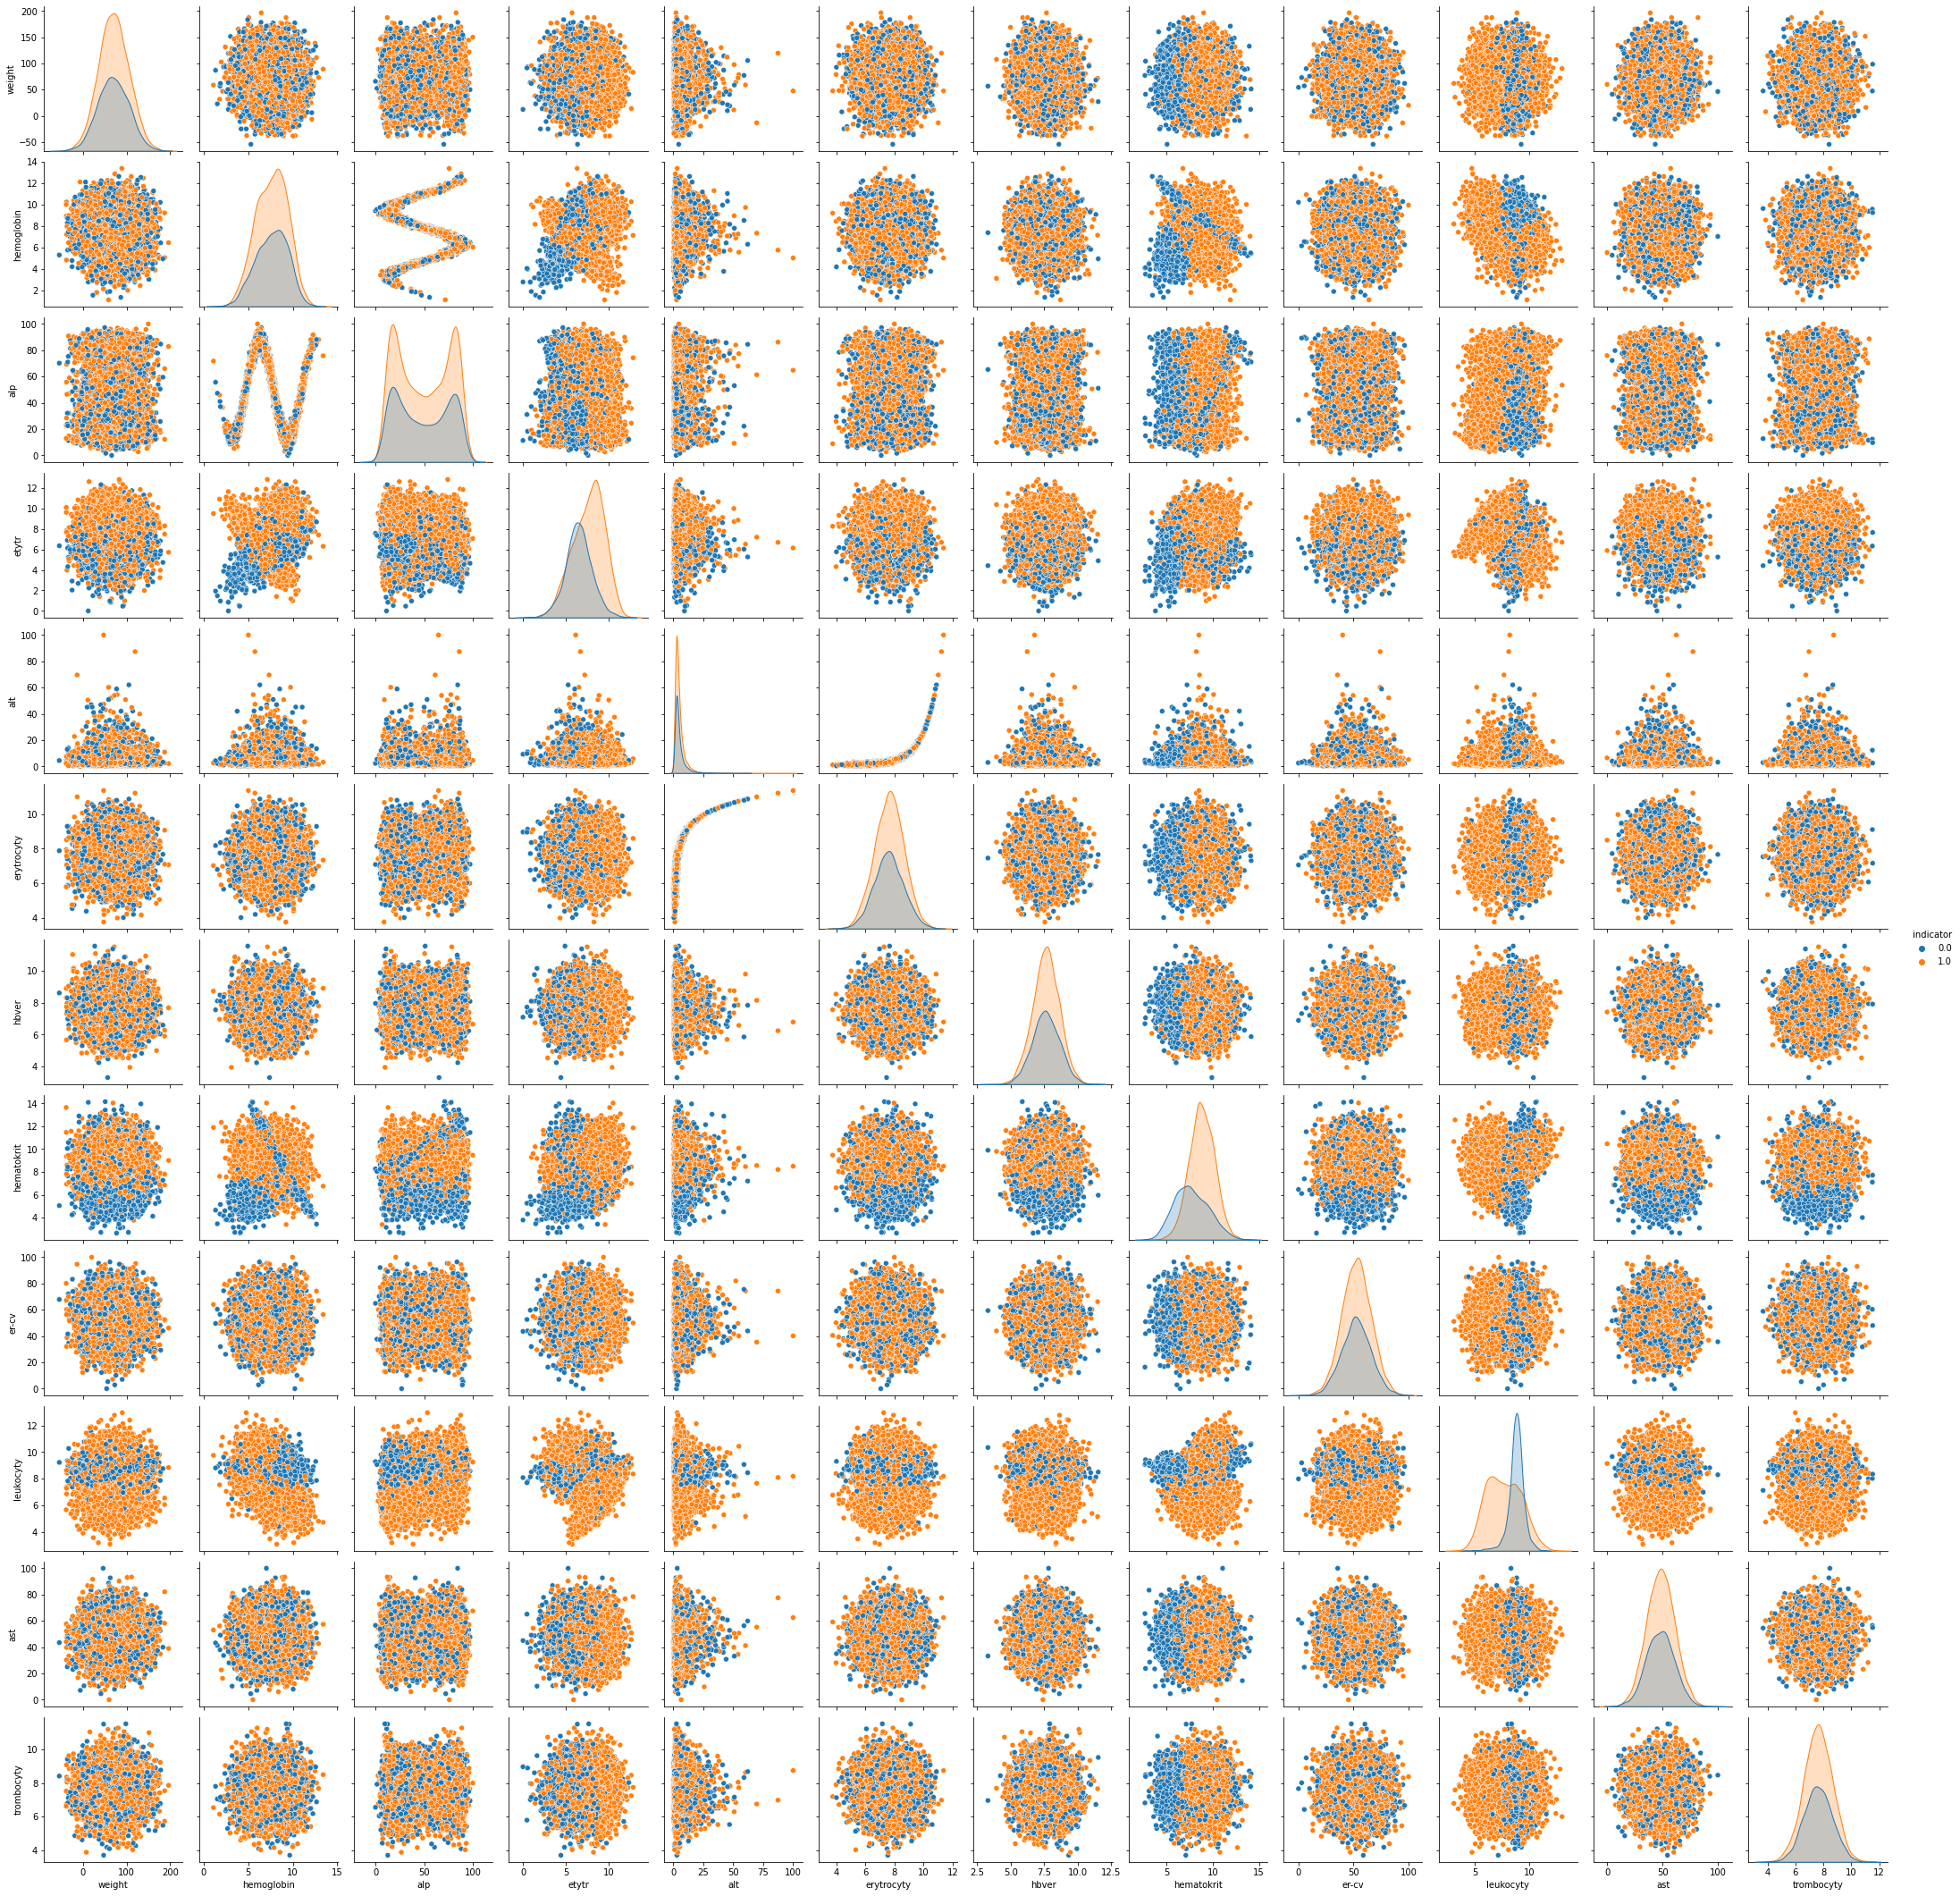

In [45]:
 sns.pairplot(merged, hue="indicator", dropna=True, vars=['weight', 'hemoglobin', 'alp', 'etytr', 'alt',
                                                          'erytrocyty', 'hbver', 'hematokrit',
                                                          'er-cv', 'leukocyty', 'ast', 'trombocyty'])

In [46]:
labor.corr()

index    weight  hemoglobin       alp     etytr       alt  \
index       1.000000  0.012996    0.001189 -0.010044  0.021588  0.012657   
weight      0.012996  1.000000   -0.008630  0.001016 -0.008526 -0.000766   
hemoglobin  0.001189 -0.008630    1.000000 -0.556709  0.259444  0.008399   
alp        -0.010044  0.001016   -0.556709  1.000000 -0.241561  0.012876   
etytr       0.021588 -0.008526    0.259444 -0.241561  1.000000 -0.010173   
alt         0.012657 -0.000766    0.008399  0.012876 -0.010173  1.000000   
erytrocyty  0.018537 -0.004177    0.008946  0.007804  0.002729  0.766217   
hbver       0.004062  0.008512   -0.017214  0.026981 -0.005059 -0.014341   
hematokrit -0.008957  0.005351    0.022012 -0.026477  0.171819  0.023043   
indicator  -0.008192  0.010240    0.001261  0.016469  0.300965  0.003407   
er-cv      -0.005742  0.002056   -0.000601  0.004906  0.005758  0.003356   
leukocyty   0.001026  0.000907   -0.409937  0.310392 -0.356013  0.002878   
smoker     -0.006369  0.003198   -0.012290 -0.001189  0.018910  0.009358   
ast         0.030712 -0.003890    0.000020 -0.000257 -0.007433  0.016120   
trombocyty  0.002249  0.031532   -0.006345  0.018788  0.007310  0.002622   

            erytrocyty     hbver  hematokrit  indicator     er-cv  leukocyty  \
index         0.018537  0.004062   -0.008957  -0.008192 -0.005742   0.001026   
weight       -0.004177  0.008512    0.005351   0.010240  0.002056   0.000907   
hemoglobin    0.008946 -0.017214    0.022012   0.001261 -0.000601  -0.409937   
alp           0.007804  0.026981   -0.026477   0.016469  0.004906   0.310392   
etytr         0.002729 -0.005059    0.171819   0.300965  0.005758  -0.356013   
alt           0.766217 -0.014341    0.023043   0.003407  0.003356   0.002878   
erytrocyty    1.000000 -0.009038    0.024050   0.013604 -0.004037   0.000578   
hbver        -0.009038  1.000000   -0.003272  -0.003880  0.006588  -0.002366   
hematokrit    0.024050 -0.003272    1.000000   0.321273  0.011823  -0.020610   
indicator     0.013604 -0.003880    0.321273   1.000000  0.008504  -0.371278   
er-cv        -0.004037  0.006588    0.011823   0.008504  1.000000   0.010620   
leukocyty     0.000578 -0.002366   -0.020610  -0.371278  0.010620   1.000000   
smoker       -0.002843  0.010100    0.001015  -0.011537 -0.009472  -0.008318   
ast           0.021083 -0.019728    0.009739   0.011170 -0.008791  -0.005830   
trombocyty    0.000254 -0.011285    0.003916   0.001762 -0.014018  -0.004729   

              smoker       ast  trombocyty  
index      -0.006369  0.030712    0.002249  
weight      0.003198 -0.003890    0.031532  
hemoglobin -0.012290  0.000020   -0.006345  
alp        -0.001189 -0.000257    0.018788  
etytr       0.018910 -0.007433    0.007310  
alt         0.009358  0.016120    0.002622  
erytrocyty -0.002843  0.021083    0.000254  
hbver       0.010100 -0.019728   -0.011285  
hematokrit  0.001015  0.009739    0.003916  
indicator  -0.011537  0.011170    0.001762  
er-cv      -0.009472 -0.008791   -0.014018  
leukocyty  -0.008318 -0.005830   -0.004729  
smoker      1.000000  0.001052    0.002907  
ast         0.001052  1.000000    0.007304  
trombocyty  0.002907  0.007304    1.000000

<AxesSubplot:>

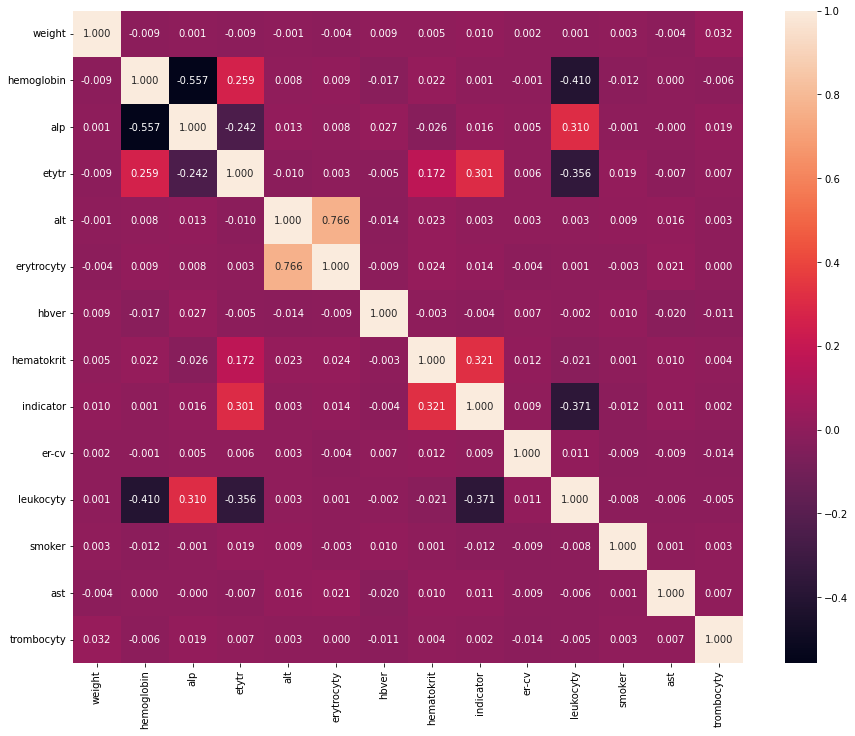

In [47]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(merged.corr(), ax=ax, annot=True, fmt=".3f")

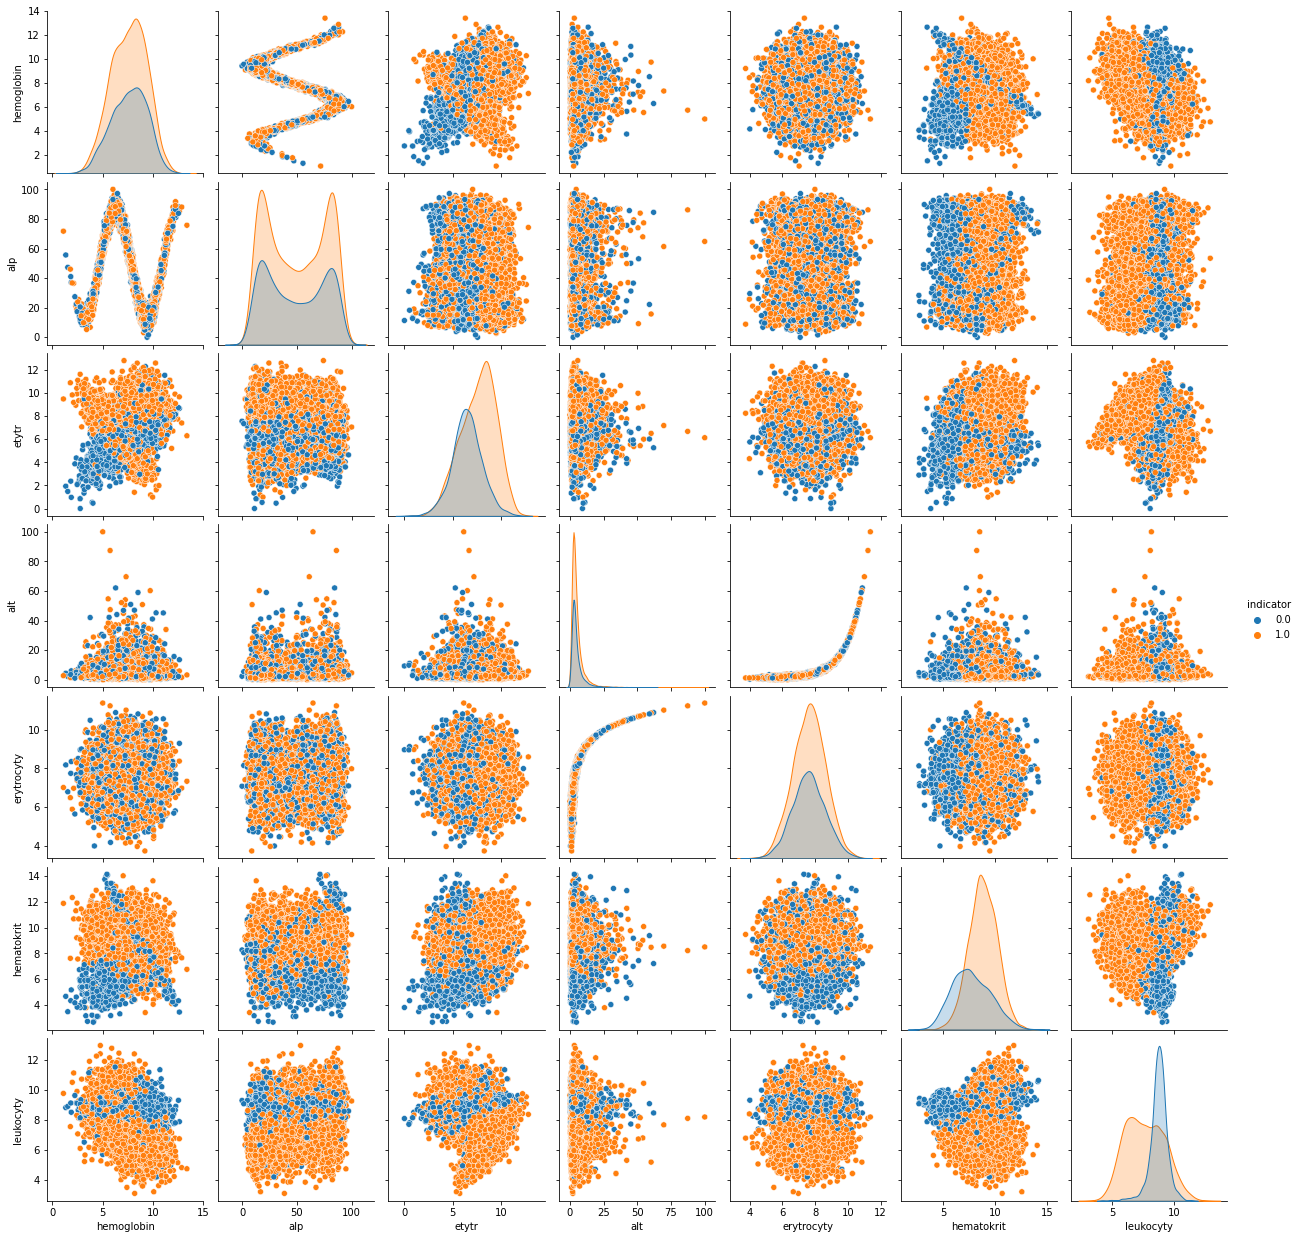

In [48]:
sns.pairplot(labor, hue="indicator", vars=['hemoglobin', 'alp', 'etytr', 'alt', 'erytrocyty', 'hematokrit', 'leukocyty'], dropna=True)

#### Identifikácia závislostí medzi dvojicami atribútov a závislostí medzi predikovanou premennou a ostatnými premennými na základe korelácií

<AxesSubplot:xlabel='alp', ylabel='hemoglobin'>

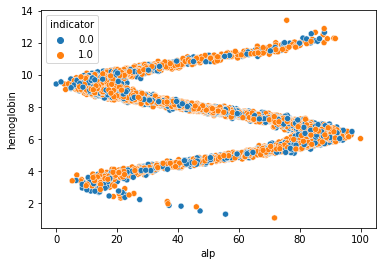

In [49]:
sns.scatterplot(x=labor['alp'], y=labor['hemoglobin'], hue=labor['indicator'])

Hoci sa podľa hodnoty korelácie zdá byť tento pairplot dôležitý, v skutočnosti nie je.

Niektoré hodnoty nevykazujú významné rozdiely medzi pacientmi ktorým sa stav zlepšil a medzi tými, ktorým sa nezlepšil.

<AxesSubplot:xlabel='indicator', ylabel='hemoglobin'>

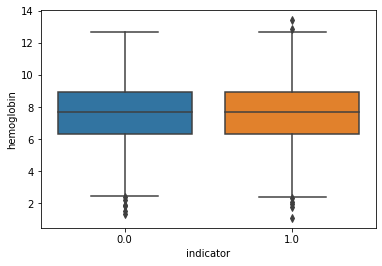

In [50]:
sns.boxplot(x='indicator', y='hemoglobin', data=merged)

<AxesSubplot:xlabel='indicator', ylabel='alp'>

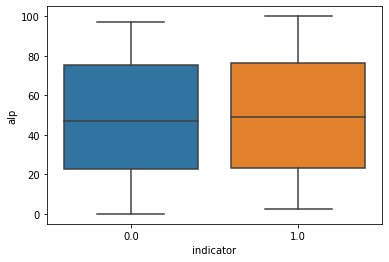

In [51]:
sns.boxplot(x='indicator', y='alp', data=merged)

Niektoré hodnoty vykazujú rozdiely medzi pacientmi ktorým sa stav zlepšil a medzi tými, ktorým sa nezlepšil. O tom, či sú tieto rozdiely signifikantné, sformulujeme hypotézy.

<AxesSubplot:xlabel='leukocyty', ylabel='etytr'>

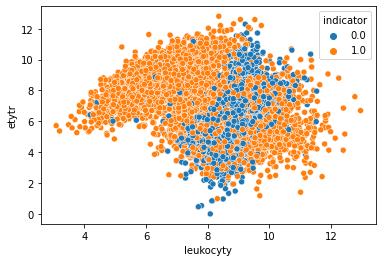

In [52]:
sns.scatterplot(x=labor['leukocyty'], y=labor['etytr'], hue=labor['indicator'])

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

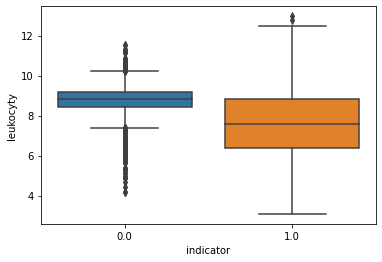

In [53]:
sns.boxplot(x='indicator', y='leukocyty', data=merged)

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

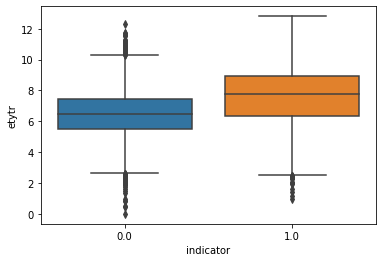

In [54]:
sns.boxplot(x='indicator', y='etytr', data=merged)

### 3. Formulácia a štatistické overenie hypotéz o dátach (2 body)
* Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
* Sformulované hypotézy overte vhodne zvoleným štatistickým testom.

In [55]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [56]:
def remove_outliers(a):
    a_out = identify_outliers(a)
    a = a.drop(a_out.index)
    return a

#### Hypotéza 1

$H_0$: Hladina leukocytov u pacientov so zlepšeným stavom je v priemere rovnaká, ako hladina leukocytov u pacientov s nezlepšeným stavom.

$H_A$: Rozdiel medzi hladinou leukocytov v krvi pri pacientoch so zlepšeným stavom oproti pacientom s nezlepšeným stavom je signifikantný.

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

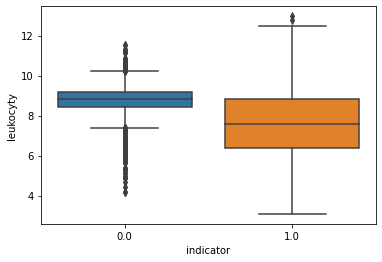

In [57]:
sns.boxplot(x='indicator', y='leukocyty', data=merged)

In [58]:
leukocyty_i = merged.loc[(merged['indicator'] == 1) & (merged['leukocyty'].notnull()), 'leukocyty']

In [59]:
leukocyty_i.describe()

count    6403.000000
mean        7.649769
std         1.575718
min         3.083190
25%         6.395285
50%         7.576450
75%         8.839465
max        12.962710
Name: leukocyty, dtype: float64

In [60]:
leukocyty_i = remove_outliers(leukocyty_i)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='leukocyty', ylabel='Density'>

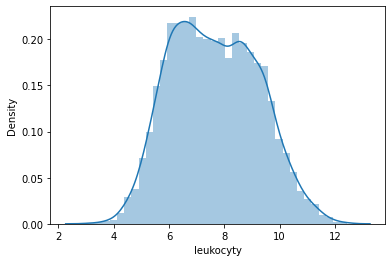

In [61]:
sns.distplot(leukocyty_i)

In [62]:
leukocyty_ni = merged.loc[(merged['indicator'] == 0) & (merged['leukocyty'].notnull()), 'leukocyty']

In [63]:
leukocyty_ni.describe()

count    3569.000000
mean        8.762914
std         0.722841
min         4.184570
25%         8.444770
50%         8.806140
75%         9.155660
max        11.539010
Name: leukocyty, dtype: float64

In [64]:
leukocyty_ni = remove_outliers(leukocyty_ni)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='leukocyty', ylabel='Density'>

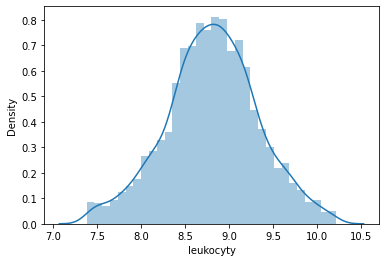

In [65]:
sns.distplot(leukocyty_ni)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


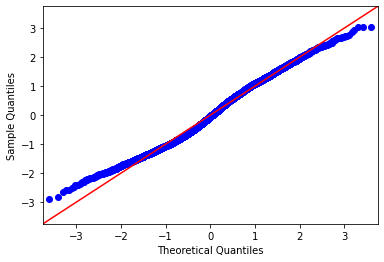

In [66]:
_ = sm.ProbPlot(leukocyty_i, fit=True).qqplot(line='45')

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


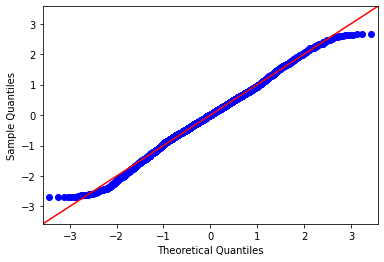

In [67]:
_ = sm.ProbPlot(leukocyty_ni, fit=True).qqplot(line='45')

In [68]:
stats.shapiro(leukocyty_i)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9888266921043396, pvalue=4.2251243671053383e-22)

In [69]:
stats.shapiro(leukocyty_ni)

ShapiroResult(statistic=0.9965740442276001, pvalue=5.863518595106143e-07)

Na základe pvalue Shapiro-Wilkovho testu normálnosti môžeme prehlásiť, že dáta pochádzajú z iného, ako normálneho rozdelenia. 1. podmienka pre t-test nie je splnená. Varianciu netreba testovať, t-test sa použiť nedá. Keďže neboli splnené podmienky pre t-test, použijeme neparametrický Mann-Whiteneyho U-test.

In [70]:
stats.mannwhitneyu(leukocyty_i, leukocyty_ni)

MannwhitneyuResult(statistic=5681499.5, pvalue=0.0)

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

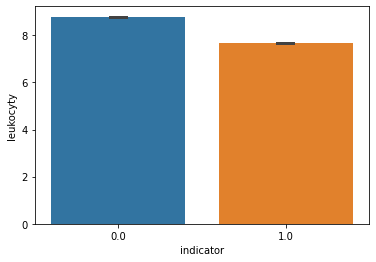

In [71]:
sns.barplot(x='indicator', y='leukocyty', data=merged, capsize=0.1, errwidth=2)

Tento graf povrdzuje, že odhad je dostatočne presný.

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

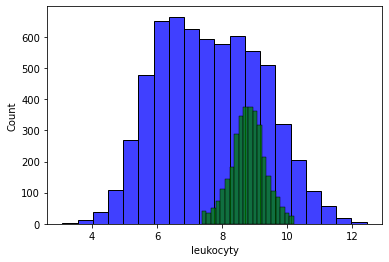

In [72]:
sns.histplot(leukocyty_i, bins=20, color='blue')
sns.histplot(leukocyty_ni, bins=20, color='green')

Keďže je hodnota pvalue < 0.001, pravdepodobnosť, chyby 1. rádu, že je $H_0$ pravdivá a my ju zamietneme je zanedbateľná - Zamietame $H_0$ v prospech $H_A$

$H_A$: Rozdiel medzi hladinou leukocytov v krvi pri pacientoch so zlepšeným stavom oproti pacientom s nezlepšeným stavom je signifikantný.

#### Hypotéza 2

$H_0$: Hladina etytr u pacientov so zlepšeným stavom je v priemere rovnaká, ako hladina leukocytov u pacientov s nezlepšeným stavom.

$H_A$: Rozdiel medzi hladinou etytr v krvi pri pacientoch so zlepšeným stavom oproti pacientom s nezlepšeným stavom je signifikantný.

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

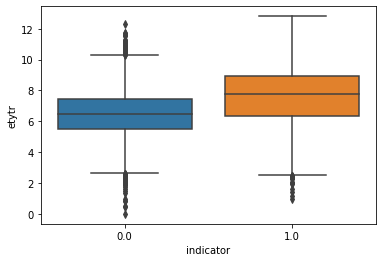

In [73]:
sns.boxplot(x='indicator', y='etytr', data=merged)

In [74]:
etytr_i = merged.loc[(merged.indicator == 1) & (merged['etytr'].notnull()), 'etytr']

In [75]:
etytr_i.describe()

count    6401.000000
mean        7.608550
std         1.826952
min         0.989410
25%         6.358910
50%         7.803530
75%         8.943100
max        12.810620
Name: etytr, dtype: float64

In [76]:
etytr_ni = merged.loc[(merged.indicator == 0) & (merged['etytr'].notnull()), 'etytr']

In [77]:
etytr_ni.describe()

count    3571.000000
mean        6.466104
std         1.558882
min         0.000000
25%         5.504415
50%         6.446300
75%         7.423200
max        12.299010
Name: etytr, dtype: float64

In [78]:
etytr_i = remove_outliers(etytr_i)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='etytr', ylabel='Density'>

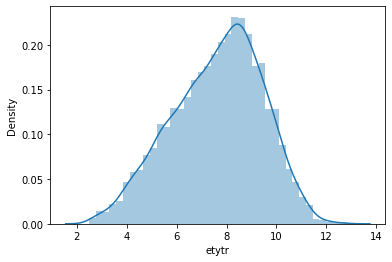

In [79]:
sns.distplot(etytr_i)

In [80]:
etytr_ni = remove_outliers(etytr_ni)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='etytr', ylabel='Density'>

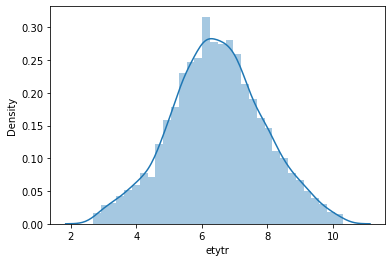

In [81]:
sns.distplot(etytr_ni)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


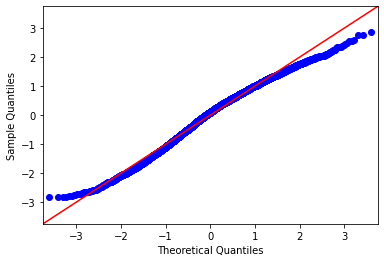

In [82]:
_ = sm.ProbPlot(etytr_i, fit=True).qqplot(line='45')

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


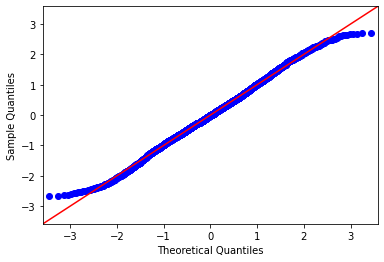

In [83]:
_ = sm.ProbPlot(etytr_ni, fit=True).qqplot(line='45')

In [84]:
stats.shapiro(etytr_i)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9884012937545776, pvalue=1.7273143243144255e-22)

In [85]:
stats.shapiro(etytr_ni)

ShapiroResult(statistic=0.9975199103355408, pvalue=2.0011897504446097e-05)

Na základe pvalue Shapiro-Wilkovho testu normálnosti môžeme prehlásiť, že dáta pochádzajú z iného, ako normálneho rozdelenia. 1. podmienka pre t-test nie je splnená. Varianciu netreba testovať, t-test sa použiť nedá. Keďže neboli splnené podmienky pre t-test, použijeme neparametrický Mann-Whiteneyho U-test.

In [86]:
stats.mannwhitneyu(etytr_i, etytr_ni)

MannwhitneyuResult(statistic=15528684.0, pvalue=1.3400242083971037e-229)

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

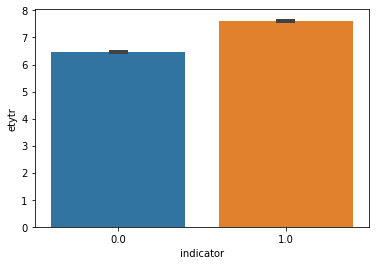

In [87]:
sns.barplot(x='indicator', y='etytr', data=merged, capsize=0.1, errwidth=2)

Tento graf povrdzuje, že odhad je dostatočne presný.

<AxesSubplot:xlabel='etytr', ylabel='Count'>

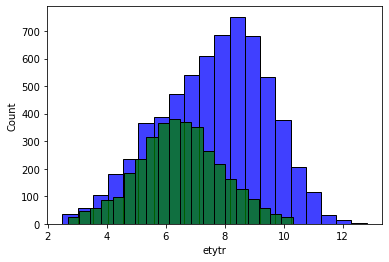

In [88]:
sns.histplot(etytr_i, bins=20, color='blue')
sns.histplot(etytr_ni, bins=20, color='green')

Keďže je hodnota pvalue < 0.001, pravdepodobnosť, chyby 1. rádu, že je $H_0$ pravdivá a my ju zamietneme je zanedbateľná - Zamietame $H_0$ v prospech $H_A$

$H_A$: Rozdiel medzi hladinou etytr v krvi pri pacientoch so zlepšeným stavom oproti pacientom s nezlepšeným stavom je signifikantný.

### 4. Identifikácia problémov v dátach s navrhnutým riešením (3 body)
* Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
* Navrhnuté riešenie prvotne realizujte na dátach.

* Odstránenie explicitného indexu
    * Implicitne ho pridáva pandas
* Opravenie jednoduchých chýb
    * Nahradenie textových stĺpcov číselnými hodnotami (napríklad v stĺpci smoker)
    * Opravenie preklepu v stĺci race
* Opravenie dátumov
    * Zjednotenie formátu dátumov narodenia
* Unikátnosť
    * Na základe toho, že počet unikátnych ssn v tabuľke labor sa zhoduje s počtom riadkov v tabuľke profiles, môžeme usúdiť, že žiadne duplicitné záznamy sa v tabuľke profiles nenachádzajú
* Chyby s hodnotami
    * Chýbajúce hodnoty sa nachádzajú v datasete labor, v datasete profiles sa nenachádzajú
    * Chbajúce hodnoty sme v tejto časti projektu neriešili. V budúcich verziách projektu budú pravdepodobne nahradené priemerom, keďže predstavujú iba zhruba 3% všetkých hodnôt.
    * Vychýlené hodnoty (napríklad weight) sú prítomné vo viacerých stĺpcoch, ich riešením sa budeme zaoberať v budúcej fáze projektu.


### Správa sa odovzdáva v 6. týždni semestra

* Na cvičení, dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku.
* Správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 31.10.2021 23:59.